In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_df = pd.read_csv('Kaggle/housing_train_data.csv')

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Converting the column MSSubClass in to a str cause it should be a string not numerical

house_df['MSSubClass'] = house_df['MSSubClass'].apply(str)

In [6]:
#Splitting the data into object and numerical data sets

object_df = house_df.select_dtypes(include = 'object')

numeric_df = house_df.select_dtypes(exclude = 'object')

In [7]:
object_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
numeric_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:

numeric_df.isnull().sum()

# Lot Frontage, Mason Veener Area, and Garage Year Built  was columns will null values


Id                 0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
numeric_df['LotFrontage'] = numeric_df['LotFrontage'].fillna(0).astype(np.int64)

numeric_df['MasVnrArea'] = numeric_df['MasVnrArea'].fillna(0).astype(np.int64)

numeric_df['GarageYrBlt'] = numeric_df['GarageYrBlt'].fillna(0).astype(np.int64)

C:\Users\moore\AppData\Local\Temp/ipykernel_10360/1313788154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['LotFrontage'] = numeric_df['LotFrontage'].fillna(0).astype(np.int64)
C:\Users\moore\AppData\Local\Temp/ipykernel_10360/1313788154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['MasVnrArea'] = numeric_df['MasVnrArea'].fillna(0).astype(np.int64)
C:\Users\moore\AppData\Local\Temp/ipykernel_10360/1313788154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [11]:
numeric_df.isnull().sum()


Id               0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [12]:
object_df.isnull().sum()

#Alley, Basement Quality, Basement Condition, Basement Exposure, Basement Fin type 1, Basement Fin type 2
#Electrical, Fire Place Quality, Garage Type, Garage, Condition, Garage Quality, Garage Finish,
#Pool Quality, Fence, Misc Features are all the columns missing data

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [13]:
#The 81 values missing in the Garage section in both object and numerical df are homes with NO Garage

#The 37 / 38 missing values in the basement section are homes with no basement

#The 1369 missing values in the Alley are homes with no alley access

#The 690 values are homes with no fireplace

#Safe to assume the missing values of in the data set are for homes that do not have that item


df_object_dummies = pd.get_dummies(object_df, drop_first = True)

In [14]:
df_object_dummies.isnull().sum()

MSSubClass_160           0
MSSubClass_180           0
MSSubClass_190           0
MSSubClass_20            0
MSSubClass_30            0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 223, dtype: int64

In [15]:
#Combining the Data Frames

final_df = pd.concat([numeric_df, df_object_dummies], axis=1)

In [16]:
final_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
final_df.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 260, dtype: int64

In [18]:
final_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)

In [19]:
final_df.corr()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
LotFrontage,-0.019761,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,...,0.005374,-0.011881,0.183706,0.001366,-0.139867,-0.004724,-0.009519,0.028489,-0.134115,0.184103
LotArea,-0.033226,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,0.012609,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.001299,-0.019779,-0.156175,-0.050663,0.163684,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,-0.004724,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,-0.015130,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,-0.009519,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,-0.026277,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.028489,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,-0.007929,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,-0.134115,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,0.041207,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [20]:
#Since I are only interested in the "Sale Price" correlation we will grab the "Sale Price" colum

corr_df = final_df.corr()

corr_df['SalePrice']

#This is how all the features in the data set are correlated to "Sale Price"

Id                      -0.021917
LotFrontage              0.209624
LotArea                  0.263843
OverallQual              0.790982
OverallCond             -0.077856
                           ...   
SaleCondition_AdjLand   -0.050686
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 260, dtype: float64

In [21]:
corr_df['SalePrice'].sort_values().iloc[1:-1]

KitchenQual_TA      -0.519298
BsmtQual_TA         -0.452394
GarageFinish_Unf    -0.410608
MasVnrType_None     -0.374468
GarageType_Detchd   -0.354141
                       ...   
TotalBsmtSF          0.613581
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
Name: SalePrice, Length: 258, dtype: float64

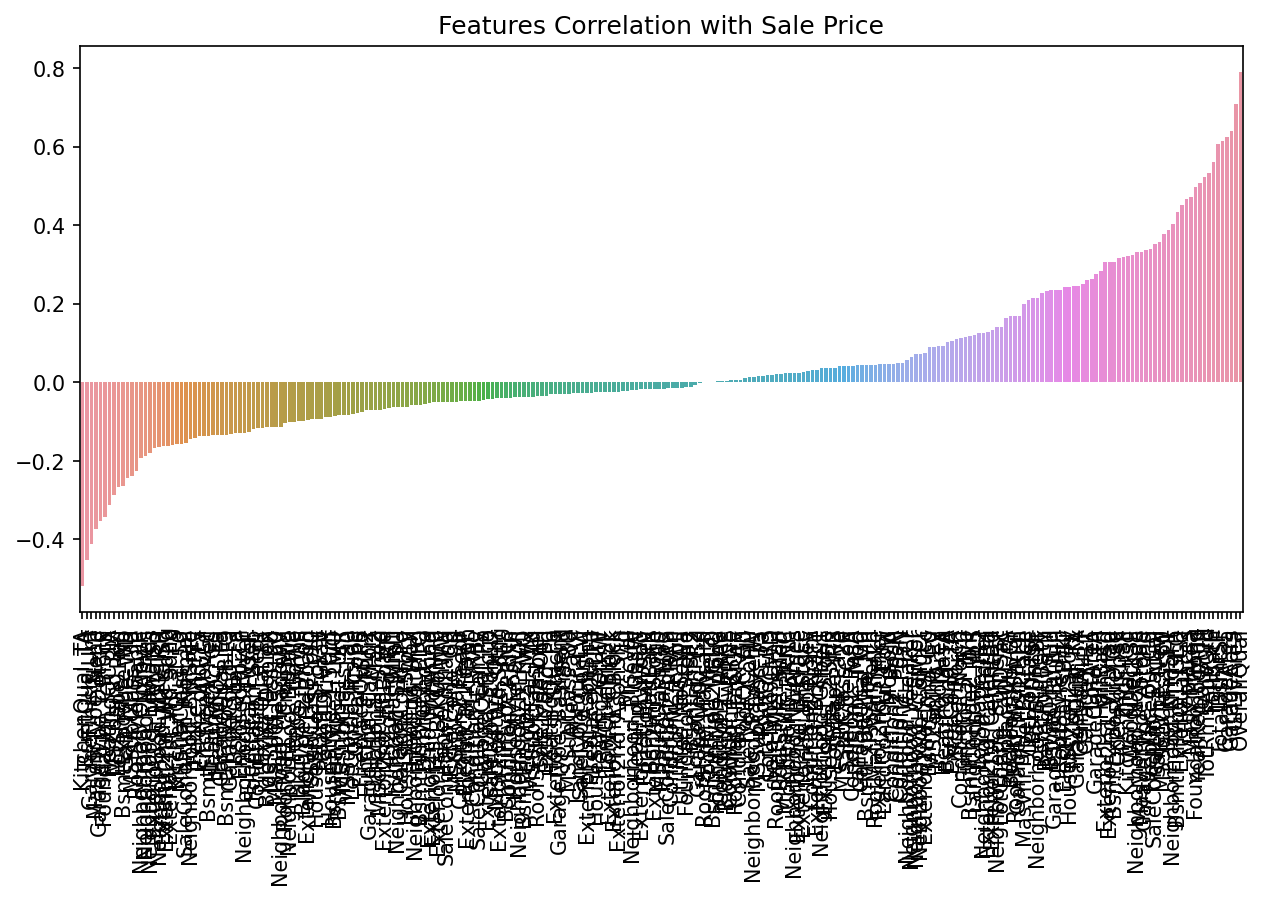

In [22]:
#Creating Bar Plot


sale_price_corr = corr_df['SalePrice'].sort_values().iloc[1:-1]

plt.figure(figsize=(10,5),dpi=150)

plt.title("Features Correlation with Sale Price")

sns.barplot(x=sale_price_corr.index,y=sale_price_corr.values)

plt.xticks(rotation=90);

In [23]:
#Need to figure out which of these features above are above 0.40 (may need to change value) correlation

type(sale_price_corr)

pandas.core.series.Series

In [24]:
sale_price_corr_df = corr_df[['SalePrice']].sort_values(by ='SalePrice').iloc[1:-1]

sale_price_corr_df

,SalePrice
KitchenQual_TA,-0.519298
BsmtQual_TA,-0.452394
GarageFinish_Unf,-0.410608
MasVnrType_None,-0.374468
GarageType_Detchd,-0.354141
...,...
TotalBsmtSF,0.613581
GarageArea,0.623431
GarageCars,0.640409
GrLivArea,0.708624


In [25]:
abs_sale_price_corr_df = abs(sale_price_corr_df)

abs_sale_price_corr_df

,SalePrice
KitchenQual_TA,0.519298
BsmtQual_TA,0.452394
GarageFinish_Unf,0.410608
MasVnrType_None,0.374468
GarageType_Detchd,0.354141
...,...
TotalBsmtSF,0.613581
GarageArea,0.623431
GarageCars,0.640409
GrLivArea,0.708624


In [26]:
#Deciding how to choose which features to include in your model since I think all features are not necessary


abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.20]

,SalePrice
KitchenQual_TA,0.519298
BsmtQual_TA,0.452394
GarageFinish_Unf,0.410608
MasVnrType_None,0.374468
GarageType_Detchd,0.354141
...,...
TotalBsmtSF,0.613581
GarageArea,0.623431
GarageCars,0.640409
GrLivArea,0.708624


In [27]:
#Deciding how to choose which features to include in your model since I think all features are not necessary


abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.28]

,SalePrice
KitchenQual_TA,0.519298
BsmtQual_TA,0.452394
GarageFinish_Unf,0.410608
MasVnrType_None,0.374468
GarageType_Detchd,0.354141
Foundation_CBlock,0.343263
HeatingQC_TA,0.312677
MSZoning_RM,0.288065
HalfBath,0.284108
Exterior1st_VinylSd,0.305009


In [28]:
#Deciding how to choose which features to include in your model since I think all features are not necessary


abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.30]

,SalePrice
KitchenQual_TA,0.519298
BsmtQual_TA,0.452394
GarageFinish_Unf,0.410608
MasVnrType_None,0.374468
GarageType_Detchd,0.354141
Foundation_CBlock,0.343263
HeatingQC_TA,0.312677
Exterior1st_VinylSd,0.305009
Exterior2nd_VinylSd,0.306389
BsmtExposure_Gd,0.307298


In [29]:
#Creating dataframes with correct indexs willing to train.

model_one_df = abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.20]

model_two_df = abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.28] #This is the one we will train first

model_three_df = abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.35]

model_four_df = abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.10]

model_five_df = abs_sale_price_corr_df[abs_sale_price_corr_df['SalePrice'] >= 0.15]

In [30]:
model_two_df.index

Index(['KitchenQual_TA', 'BsmtQual_TA', 'GarageFinish_Unf', 'MasVnrType_None',
       'GarageType_Detchd', 'Foundation_CBlock', 'HeatingQC_TA', 'MSZoning_RM',
       'HalfBath', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'BsmtExposure_Gd', 'OpenPorchSF', '2ndFlrSF', 'KitchenQual_Gd',
       'WoodDeckSF', 'Neighborhood_NoRidge', 'MasVnrType_Stone',
       'GarageType_Attchd', 'FireplaceQu_Gd', 'SaleCondition_Partial',
       'SaleType_New', 'MSSubClass_60', 'BsmtFinSF1', 'Neighborhood_NridgHt',
       'BsmtFinType1_GLQ', 'ExterQual_Gd', 'Fireplaces', 'MasVnrArea',
       'Foundation_PConc', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'GrLivArea', 'OverallQual'],
      dtype='object')

In [31]:
#Splitting features and label into X features and y label

#Features from "model_two_df"


X = final_df.loc[:,['KitchenQual_TA', 'BsmtQual_TA', 'GarageFinish_Unf', 'MasVnrType_None',
       'GarageType_Detchd', 'Foundation_CBlock', 'HeatingQC_TA', 'MSZoning_RM',
       'HalfBath', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'BsmtExposure_Gd', 'OpenPorchSF', '2ndFlrSF', 'KitchenQual_Gd',
       'WoodDeckSF', 'Neighborhood_NoRidge', 'MasVnrType_Stone',
       'GarageType_Attchd', 'FireplaceQu_Gd', 'SaleCondition_Partial',
       'SaleType_New', 'MSSubClass_60', 'BsmtFinSF1', 'Neighborhood_NridgHt',
       'BsmtFinType1_GLQ', 'ExterQual_Gd', 'Fireplaces', 'MasVnrArea',
       'Foundation_PConc', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'GrLivArea', 'OverallQual']]

y = final_df['SalePrice']

In [32]:
#Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.3,random_state=101)

#Train = 70%

#Validation/Test Split
X_eval , X_test , y_eval , y_test = train_test_split(X_other,y_other,test_size=0.5, random_state = 101)

#Validation = 15%
#Test = 15%

In [33]:
len(final_df)

1460

In [34]:
len(X_train)

1022

In [35]:
len(X_test)

219

In [36]:
len(X_eval)

219

In [37]:
#Scaling the data cause it does not hurt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_eval = scaler.transform(X_eval)
scaled_X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [39]:
#Need to do research on what valid values i need for each argument in parameter grid

gb_param_grid = {'n_estimators':[100,300,500,700],
             'learning_rate':[0.2,0.1,0.05,0.001],
             'max_depth':[3,5,7,9]}

en_param_grid = {'alpha':[0.1,1,5,10,50,100], 
              'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1]}

In [40]:
gb_model = GradientBoostingRegressor()

gb_grid = GridSearchCV(gb_model,gb_param_grid)

In [41]:
en_model = ElasticNet()

en_grid = GridSearchCV(en_model,en_param_grid)

In [42]:
#Random Forest Model code goes here


rf_model = RandomForestRegressor()

#Look at the Random Forest Regessor Notes this may help with what im trying to do

In [43]:
#Run first thing in the morning

en_grid.fit(X_train,y_train)

C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405230550017.3755, tolerance: 504326848.4347934
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360672064831.3573, tolerance: 525613891.58679193
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420336667024.0316, tolerance: 501394598.2019835
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420201832433.1644, tolerance: 501394598.2019835
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983418423.3643799, tolerance: 510530949.73962504
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488796410553.0917, tolerance: 537505124.4671557
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514095957653.49457, tolerance: 537505124.4671557
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19422572331.005493, tolerance: 504326848.4347934
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213582463647.67212, tolerance: 525613891.58679193
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96160872980.6352, tolerance: 525613891.58679193
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135242597630.70905, tolerance: 501394598.2019835
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453127359287.5097, tolerance: 537505124.4671557
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6167415938.5448, tolerance: 525613891.58679193
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9616497337.003418, tolerance: 501394598.2019835
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22971807353.104004, tolerance: 537505124.4671557
  model = cd_fast.enet_coordinate_descent(
C:\Users\moore\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]})

In [46]:
#Wait until the weekend and run the code 

gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.1, 0.05, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 300, 500, 700]})

In [50]:
#Where Random Forest will go 


rf_param_grid = {'n_estimators':[20,50,100,300,500,700],
                 'max_features':[5,10,20,30,40],
                 'bootstrap':[True],
                 'oob_score':[True]}

In [48]:
#Checking amount of features for parameter grid
len(X_train.columns)

40

In [49]:
#Double check the amount of features for parameter grid

len(model_two_df.index)

40

In [51]:
#How many features do I have (use values around n_features, sqrt n_features, or log2 n_features) in param grid = 40

#Go back and look at what bootstrapping is and the oob score on udemy or notes (random forest 2 I believe)

#make sure to use the same random state when train test spliting or anywhere else that requires you to set a random state.

#make sure to look at important features

rf_grid = GridSearchCV(rf_model,rf_param_grid)

In [52]:
rf_grid.fit(X_train,y_train)

C:\Users\moore\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\moore\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\moore\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\moore\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not hav

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_features': [5, 10, 20, 30, 40],
                         'n_estimators': [20, 50, 100, 300, 500, 700],
                         'oob_score': [True]})

In [53]:
gb_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [54]:
#Based on L1_ratio I going to as Lasso Regression as another model

en_grid.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [55]:
rf_grid.best_params_

{'bootstrap': True, 'max_features': 10, 'n_estimators': 100, 'oob_score': True}

In [56]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV()

In [93]:
#Parameter grid adjustment number 2

gb_param_grid = {'n_estimators':[100,300,500,700],
             'learning_rate':[0.01,0.05,0.08],
             'max_depth':[2,3,4]}

en_param_grid = {'alpha':[80,100,200,300,500], 
              'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1],
                'max_iter':[3000000,5000000,20000000,50000000,100000000]}

rf_param_grid = {'n_estimators':[90,100,300,500,700],
                 'max_features':[5,10,20,30,40],
                 'bootstrap':[True],
                 'oob_score':[True]}

lasso_param_grid = {'n_alphas':[20,50,100,300,500],
                 'max_iter':[3000000,5000000,20000000,50000000,100000000],
                 'cv':[2,5,10,50],}

In [86]:
gb_grid = GridSearchCV(gb_model,gb_param_grid)

In [87]:
en_grid = GridSearchCV(en_model,en_param_grid)

In [94]:
rf_grid = GridSearchCV(rf_model,rf_param_grid)

In [89]:
lasso_grid = GridSearchCV(lasso_model,lasso_param_grid)

In [90]:
#Refitting the data to each the model and their new parameters

en_grid.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [80, 100, 200, 300, 500],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1],
                         'max_iter': [3000000, 5000000, 20000000, 50000000,
                                      100000000]})

In [91]:
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.08],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 300, 500, 700]})

In [95]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_features': [5, 10, 20, 30, 40],
                         'n_estimators': [90, 100, 300, 500, 700],
                         'oob_score': [True]})

In [92]:
lasso_grid.fit(X_train,y_train)

GridSearchCV(estimator=LassoCV(),
             param_grid={'cv': [2, 5, 10, 50],
                         'max_iter': [3000000, 5000000, 20000000, 50000000,
                                      100000000],
                         'n_alphas': [20, 50, 100, 300, 500]})

In [96]:
#Getting best Parameters
gb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}

In [97]:
en_grid.best_params_

{'alpha': 200, 'l1_ratio': 1, 'max_iter': 3000000}

In [98]:
rf_grid.best_params_

{'bootstrap': True, 'max_features': 10, 'n_estimators': 500, 'oob_score': True}

In [99]:
lasso_grid.best_params_

{'cv': 5, 'max_iter': 3000000, 'n_alphas': 20}

In [100]:
#Predictions

en_preds = en_grid.predict(X_eval)

In [101]:
gb_preds = gb_grid.predict(X_eval)

In [102]:
rf_preds = rf_grid.predict(X_eval)

In [103]:
lasso_preds = lasso_grid.predict(X_eval)

In [107]:
#Performance evaluation of the four models on the evaluation (trained data)
from sklearn.metrics import mean_absolute_error, mean_squared_error

en_MSE = mean_squared_error(y_eval,en_preds)

en_MSE


2613368341.8134704

In [108]:
en_MAE = mean_absolute_error(y_eval, en_preds)

en_MAE

21417.266358848057

In [109]:
lasso_MSE = mean_squared_error(y_eval,lasso_preds)

lasso_MSE

3676657908.2137647

In [110]:
lasso_MAE = mean_absolute_error(y_eval, lasso_preds)

lasso_MAE

25782.267463854605

In [111]:
gb_MSE = mean_squared_error(y_eval,gb_preds)

gb_MSE

804953306.0703298

In [112]:
gb_MAE = mean_absolute_error(y_eval, gb_preds)

gb_MAE

17746.957689062678

In [113]:
rf_MSE = mean_squared_error(y_eval,rf_preds)

rf_MSE

976394450.4116942

In [114]:
rf_MAE = mean_absolute_error(y_eval, rf_preds)

rf_MAE

17460.220269732552

In [120]:
#Remaking the models based on best parameters

final_gb_model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 500)

In [119]:
final_lasso_model = LassoCV(cv = 5, max_iter = 3000000, n_alphas=20)

In [121]:
final_en_model = ElasticNet(alpha = 200, l1_ratio = 1, max_iter = 3000000)

In [122]:
final_rf_model = RandomForestRegressor(bootstrap = True, max_features = 10, n_estimators = 500, oob_score = True)

In [123]:
#Fitting the final models

final_en_model.fit(X_train,y_train)

ElasticNet(alpha=200, l1_ratio=1, max_iter=3000000)

In [124]:
final_lasso_model.fit(X_train,y_train)

LassoCV(cv=5, max_iter=3000000, n_alphas=20)

In [125]:
final_gb_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [126]:
final_rf_model.fit(X_train,y_train)

RandomForestRegressor(max_features=10, n_estimators=500, oob_score=True)

In [128]:
#Predictions based on final models

final_en_preds = final_en_model.predict(X_test)

In [129]:
final_lasso_preds = final_lasso_model.predict(X_test)

In [130]:
final_gb_preds = final_gb_model.predict(X_test)

In [131]:
final_rf_preds = final_rf_model.predict(X_test)

In [132]:
#Performance evaluation of the four models on the test(trained data)

final_en_MSE = mean_squared_error(y_test,final_en_preds)

final_en_MSE

826932163.1269208

In [134]:
final_lasso_MSE = mean_squared_error(y_test,final_lasso_preds)

final_lasso_MSE

1465886509.3508306

In [135]:
final_gb_MSE = mean_squared_error(y_test,final_gb_preds)

final_gb_MSE

639577236.0545974

In [136]:
final_rf_MSE = mean_squared_error(y_test,final_rf_preds)

final_rf_MSE

761667203.5451283

In [138]:
final_gb_MAE = mean_absolute_error(y_test, final_gb_preds)

final_gb_MAE

16851.80279722586

In [140]:
final_rf_MAE = mean_absolute_error(y_test, final_rf_preds)

final_rf_MAE

17566.229878995433

In [141]:
final_en_MAE = mean_absolute_error(y_test, final_en_preds)

final_en_MAE

19648.399772944136

In [142]:
final_lasso_MAE = mean_absolute_error(y_test, final_lasso_preds)

final_lasso_MAE

26758.300250730106

In [144]:
#Root Mean Squared Error for all models

en_rmse = np.sqrt(final_en_MSE)

en_rmse

28756.42820530604

In [145]:
lasso_rmse = np.sqrt(final_lasso_MSE)

lasso_rmse

38286.89735863733

In [146]:
gb_rmse = np.sqrt(final_gb_MSE)

gb_rmse

25289.86429490276

In [147]:
rf_rmse = np.sqrt(final_rf_MSE)

rf_rmse

27598.31885360281